Connect to the MongoDB database, and access the se collection of the datasets_test database. 
The reader user is only able to list data. 

In [1]:
import pymongo
import pprint

version = '190819'

client = pymongo.MongoClient(
    'mongodb://{}:{}@localhost/?authSource={}&authMechanism=MONGODB-CR'.format(
        'reader', 'MreaderO', 'datasets'
    )
)
col = client['datasets']['se']
datasets = list(col.find({'njobs':{'$exists':1}, 'prod_date':version}))
#datasets = list(col.find({'name':'190819%ZZTo2L2Nu%mt_diBos_sys_METunclustered_down'}))
#datasets += list(col.find({'name':'190819%HiggsGGH125%mt_sm_h_sys_METrecoil_resolution_down'}))
pprint.pprint(datasets[0])
pprint.pprint(datasets[1])
print(len(datasets))

{u'_id': ObjectId('5d837f3461678c39715059b0'),
 u'name': u'190819%Embedded2017C_mt%mt_emb_sys_TES_HadronicTau_3prong0pi0_up',
 u'njobs': 85,
 u'path': u'/store/user/ltortero/heppyTrees/190819/mt_emb_sys_TES_HadronicTau_3prong0pi0_up/Embedded2017C_mt/191002_111852',
 u'prod_date': u'190819',
 u'sample': u'Embedded2017C_mt',
 u'sample_version': u'mt_emb_sys_TES_HadronicTau_3prong0pi0_up',
 u'sub_date': u'2019-10-02_13-16-46',
 u'sub_dir': u'/gridgroup/cms/torterotot/crab_submission_dirs/crab_Embedded2017C_mt_mt_emb_sys_TES_HadronicTau_3prong0pi0_up/crab_Embedded2017C_mt_190819_mt_emb_sys_TES_HadronicTau_3prong0pi0_up_2019-10-02_13-16-46',
 u'subdir_pattern': u'*',
 u'subdirs': [u'0000'],
 u'tgz_pattern': u'*',
 u'tgzs': {u'0000': [u'heppyOutput_1.tgz',
                     u'heppyOutput_10.tgz',
                     u'heppyOutput_11.tgz',
                     u'heppyOutput_12.tgz',
                     u'heppyOutput_13.tgz',
                     u'heppyOutput_14.tgz',
                   

Let's find the datasets that already appeared on the SE

In [2]:
se_datasets = [ds for ds in datasets if 'path' in ds]
print(len(se_datasets))
pprint.pprint(se_datasets[0])

3674
{u'_id': ObjectId('5d837f3461678c39715059b0'),
 u'name': u'190819%Embedded2017C_mt%mt_emb_sys_TES_HadronicTau_3prong0pi0_up',
 u'njobs': 85,
 u'path': u'/store/user/ltortero/heppyTrees/190819/mt_emb_sys_TES_HadronicTau_3prong0pi0_up/Embedded2017C_mt/191002_111852',
 u'prod_date': u'190819',
 u'sample': u'Embedded2017C_mt',
 u'sample_version': u'mt_emb_sys_TES_HadronicTau_3prong0pi0_up',
 u'sub_date': u'2019-10-02_13-16-46',
 u'sub_dir': u'/gridgroup/cms/torterotot/crab_submission_dirs/crab_Embedded2017C_mt_mt_emb_sys_TES_HadronicTau_3prong0pi0_up/crab_Embedded2017C_mt_190819_mt_emb_sys_TES_HadronicTau_3prong0pi0_up_2019-10-02_13-16-46',
 u'subdir_pattern': u'*',
 u'subdirs': [u'0000'],
 u'tgz_pattern': u'*',
 u'tgzs': {u'0000': [u'heppyOutput_1.tgz',
                     u'heppyOutput_10.tgz',
                     u'heppyOutput_11.tgz',
                     u'heppyOutput_12.tgz',
                     u'heppyOutput_13.tgz',
                     u'heppyOutput_14.tgz',
              

A bit or preprocessing. We are going to read the tgzs field to find out how many chunks are in the dataset, and to estimate the computing efficiency

We are now using the **njobs** field to compute the efficiency

You can edit the preprocessing function to add what you need in the dataset information. 

In [3]:
import pprint
import re

pattern = re.compile('.*_(\d+)\.tgz$')
def preprocess_chunks(datasets): 
    for ds in datasets: 
        tgzs = ds.get('tgzs', None)
        if tgzs is None:
            ds['nchunks'] = 0
            ds['chunk_ids'] = []
            continue
        chunks = []
        if len(tgzs)!=1:
            print('warning, need to see how to deal with 0000,0001, etc')
        for subd, subdchunks in tgzs.iteritems(): 
            # we do not consider the subdirectory, e.g. 0000
            chunks.extend(subdchunks)
        # find max integer
        ids = []
        for chunk in chunks: 
            # print(chunk)
            m = pattern.match(chunk)
            if m: 
                theid = int(m.group(1))
                # print(theid) 
                ids.append(theid)
        ds['nchunks'] = len(chunks)
        ds['chunk_ids'] = sorted(ids)

In [4]:
preprocess_chunks(datasets)
#print(datasets[500])

warning, need to see how to deal with 0000,0001, etc
warning, need to see how to deal with 0000,0001, etc
warning, need to see how to deal with 0000,0001, etc
warning, need to see how to deal with 0000,0001, etc
warning, need to see how to deal with 0000,0001, etc


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(datasets)
#pd.set_option('display.max_colwidth', -1)
df.head()

,_id,chunk_ids,fakes,harvesting,name,nchunks,njobs,path,prod_date,sample,sample_version,skim,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date
0,5d837f3461678c39715059b0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,190819%Embedded2017C_mt%mt_emb_sys_TES_Hadroni...,85,85,/store/user/ltortero/heppyTrees/190819/mt_emb_...,190819,Embedded2017C_mt,mt_emb_sys_TES_HadronicTau_3prong0pi0_up,NaN,2019-10-02_13-16-46,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191002_111852
1,5d837f3861678c39715067a6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,190819%HiggsTTH125%mt_sm_h_sys_METrecoil_respo...,151,151,/store/user/ltortero/heppyTrees/190819/mt_sm_h...,190819,HiggsTTH125,mt_sm_h_sys_METrecoil_response_up,NaN,2019-09-09_14-42-16,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190909_124424
2,5d837f3a61678c3971506d22,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,NaN,190819%HiggsTTH125%mt_sm_h_sys_TES_HadronicTau...,151,151,/store/user/ltortero/heppyTrees/190819/mt_sm_h...,190819,HiggsTTH125,mt_sm_h_sys_TES_HadronicTau_1prong0pi0_up,NaN,2019-09-09_16-08-56,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190909_141107
3,5d837f3361678c397150543d,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",NaN,NaN,190819%DYJetsToLL_M50%mt_DY_inc_sys_TES_Hadron...,234,277,/store/user/ltortero/heppyTrees/190819/mt_DY_i...,190819,DYJetsToLL_M50,mt_DY_inc_sys_TES_HadronicTau_1prong1pi0_down,NaN,2019-08-28_15-28-51,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190828_133101
4,5d837f3a61678c3971506f36,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%DY1JetsToLL_M50_LO%mt_DY_nominal,246,246,/store/user/ltortero/heppyTrees/190819/mt_DY_n...,190819,DY1JetsToLL_M50_LO,mt_DY_nominal,{u'cut': u'Flag_goodVertices && Flag_globalTig...,2019-08-26_10-53-24,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190826_085545


## number of jobs PLEASE READ 

Some datasets have a NaN number of jobs, which means that this information could not be extracted from the crab logs.
It turns out that these datasets also do not appear on the SE. What are they? 

In [7]:
#see the dataframe
df.keys()

Index([           u'_id',      u'chunk_ids',          u'fakes',
           u'harvesting',           u'name',        u'nchunks',
                u'njobs',           u'path',      u'prod_date',
               u'sample', u'sample_version',           u'skim',
             u'sub_date',        u'sub_dir', u'subdir_pattern',
              u'subdirs',    u'tgz_pattern',           u'tgzs',
           u'write_date'],
      dtype='object')

In [8]:
# Number of entries
df.shape[0]

3674

In [9]:
# filling NaN with zeros
df['njobs'].fillna(0, inplace=True)
df['nchunks'].fillna(0, inplace=True)

In [10]:
# Incomplete datasets
df[((df['nchunks'] < df['njobs']) | (df['nchunks'] == 0))].shape[0]
#df[(df['name'].str.contains('190819')) & (df['nchunks'] == 0)].shape

44

In [11]:
# Problematic datasets
df[df['njobs'] == 0].shape[0]

0

In [12]:
# see incomplete datasets
df[((df['nchunks'] < df['njobs']) | (df['nchunks'].isnull()))]

,_id,chunk_ids,fakes,harvesting,name,nchunks,njobs,path,prod_date,sample,sample_version,skim,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date
3,5d837f3361678c397150543d,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",NaN,NaN,190819%DYJetsToLL_M50%mt_DY_inc_sys_TES_Hadron...,234,277,/store/user/ltortero/heppyTrees/190819/mt_DY_i...,190819,DYJetsToLL_M50,mt_DY_inc_sys_TES_HadronicTau_1prong1pi0_down,NaN,2019-08-28_15-28-51,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190828_133101
43,5d837f3561678c3971505b0c,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WZTo3LNu%mt_DiB_nominal,65,66,/store/user/ltortero/heppyTrees/190819/mt_DiB_...,190819,WZTo3LNu,mt_DiB_nominal,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-08-22_00-47-00,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190821_224928
45,5d837f3161678c3971504efc,"[2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 16, 17, 18, ...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'parent': None, u'dir': u'/gridgroup/cms/htt...",190819%DYJetsToLL_M50%mt_DY_inc_sys_CMS_scale_...,193,277,/store/user/ltortero/heppyTrees/190819/mt_DY_i...,190819,DYJetsToLL_M50,mt_DY_inc_sys_CMS_scale_j_eta0to3_13TeV_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-09-26_11-41-15,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_100.tgz', u'heppyOutp...",190926_094324
46,5d837f3261678c39715052fb,"[2, 4, 5, 6, 8, 9, 10, 12, 19, 22, 23, 25, 26,...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'parent': None, u'dir': u'/gridgroup/cms/htt...",190819%DYJetsToLL_M50%mt_DY_inc_sys_METunclust...,231,277,/store/user/ltortero/heppyTrees/190819/mt_DY_i...,190819,DYJetsToLL_M50,mt_DY_inc_sys_METunclustered_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-08-28_13-17-17,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_10.tgz', u'heppyOutpu...",190828_111933
88,5d837f3961678c39715069f1,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%mt_emb_sys_Btagging_up,78,85,/store/user/ltortero/heppyTrees/190819/mt_emb_...,190819,Embedded2017C_mt,mt_emb_sys_Btagging_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-10-02_12-41-38,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191002_104352
94,5d837f3c61678c3971507465,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%mt_emb_sys_TES_Hadroni...,84,85,/store/user/ltortero/heppyTrees/190819/mt_emb_...,190819,Embedded2017C_mt,mt_emb_sys_TES_HadronicTau_3prong1pi0_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-10-02_14-46-20,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191002_124942
324,5d837f3c61678c3971507722,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'parent': None, u'dir': u'/gridgroup/cms/htt...",190819%DYJetsToLL_M50%mt_DY_inc_sys_Btagging_down,275,277,/store/user/ltortero/heppyTrees/190819/mt_DY_i...,190819,DYJetsToLL_M50,mt_DY_inc_sys_Btagging_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-08-28_14-20-47,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",190828_122256
325,5d837f3b61678c397150721d,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'parent': None, u'dir': u'/gridgroup/cms/htt...",190819%DYJetsToLL_M50%mt_DY_inc

## Computing efficiency

In [13]:
df['eff'] = df['nchunks']/df['njobs']

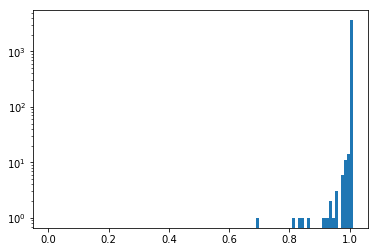

In [14]:
#_ = plt.hist(df['eff'], bins=101, range=(0,1.01))
_ = plt.hist(df['eff'], bins=101, range=(0,1.01))
plt.yscale('log')

Filter datasets with a low efficiency and list them by descending job number.

In [15]:
low_eff_cut = 1
df[((df['eff']<low_eff_cut) | (df['nchunks'] == 0))][['name', 'sample', 'sample_version', 'nchunks', 'njobs', 'eff', 'sub_date', 'sub_dir']].sort_values('sub_date', ascending=False)

,name,sample,sample_version,nchunks,njobs,eff,sub_date,sub_dir
3636,190819%DYJetsToLL_M50_ext%mt_DY_in_sys_DY_pT_r...,DYJetsToLL_M50_ext,mt_DY_in_sys_DY_pT_reweighting_up,295,296,0.996622,2020-01-22_14-05-42,/gridgroup/cms/torterotot/crab_submission_dirs...
3230,190819%WZTo1L3Nu%mt_diBos_sys_TES_promptEle_1p...,WZTo1L3Nu,mt_diBos_sys_TES_promptEle_1prong0pi0_up,43,46,0.934783,2019-10-11_13-44-47,/gridgroup/cms/torterotot/crab_submission_dirs...
3354,190819%WWToLNuQQ%mt_diBos_sys_TES_promptEle_1p...,WWToLNuQQ,mt_diBos_sys_TES_promptEle_1prong0pi0_up,60,61,0.983607,2019-10-04_16-11-57,/gridgroup/cms/torterotot/crab_submission_dirs...
901,190819%HiggsWminusH125%mt_sm_h_sys_METuncluste...,HiggsWminusH125,mt_sm_h_sys_METunclustered_up,25,29,0.862069,2019-10-02_16-03-07,/gridgroup/cms/torterotot/crab_submission_dirs...
94,190819%Embedded2017C_mt%mt_emb_sys_TES_Hadroni...,Embedded2017C_mt,mt_emb_sys_TES_HadronicTau_3prong1pi0_down,84,85,0.988235,2019-10-02_14-46-20,/gridgroup/cms/torterotot/crab_submission_dirs...
88,190819%Embedded2017C_mt%mt_emb_sys_Btagging_up,Embedded2017C_mt,mt_emb_sys_Btagging_up,78,85,0.917647,2019-10-02_12-41-38,/gridgroup/cms/torterotot/crab_submission_dirs...
837,190819%DY1JetsToLL_M50_LO_ext%mt_DYex_sys_CMS_...,DY1JetsToLL_M50_LO_ext,mt_DYex_sys_CMS_scale_j_eta0to5_13Tev_down,195,196,0.994898,2019-09-30_11-26-04,/gridgroup/cms/torterotot/crab_submission_dirs...
1495,190819%ZZTo4L_ext%mt_diBos_sys_CMS_scale_j_eta...,ZZTo4L_ext,mt_diBos_sys_CMS_scale_j_eta0to3_13TeV_up,563,564,0.998227,2019-09-26_15-42-55,/gridgroup/cms/torterotot/crab_submission_dirs...
793,190819%DYJetsToLL_M50%mt_DY_inc_sys_TES_Hadron...,DYJetsToLL_M50,mt_DY_inc_sys_TES_HadronicTau_3prong0pi0_down,225,277,0.812274,2019-09-26_11-45-30,/gridgroup/cms/torterotot/crab_submission_dirs...
45,190819%DYJetsToLL_M50%mt_DY_inc_sys_CMS_scale_...,DYJetsToLL_M50,mt_DY_inc_sys_CMS_scale_j_eta0to3_13TeV_up,193,277,0.696751,2019-09-26_11-41-15,/gridgroup/cms/torterotot/crab_submission_dirs...


In [21]:
df[(df['name'].str.contains('WJet') & df['sub_date'].str.contains('2020-01'))]

,_id,chunk_ids,fakes,harvesting,name,nchunks,njobs,path,prod_date,sample,sample_version,skim,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
23,5d837f3d61678c397150786a,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO%mt_WJ_nominal,257,257,/store/user/ltortero/heppyTrees/190819/mt_WJ_n...,190819,WJetsToLNu_LO,mt_WJ_nominal,{u'cut': u'Flag_goodVertices && Flag_globalTig...,2020-01-16_08-59-13,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_080128,1.0
686,5d837f3461678c3971505873,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO_ext%mt_WJ_nominal,370,370,/store/user/ltortero/heppyTrees/190819/mt_WJ_n...,190819,WJetsToLNu_LO_ext,mt_WJ_nominal,{u'cut': u'Flag_goodVertices && Flag_globalTig...,2020-01-16_09-01-33,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_080353,1.0
1042,5d837f3a61678c3971506f5a,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO_ext%mt_WJ_inc_sys_Btaggin...,370,370,/store/user/ltortero/heppyTrees/190819/mt_WJ_i...,190819,WJetsToLNu_LO_ext,mt_WJ_inc_sys_Btagging_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2020-01-16_10-38-44,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_094104,1.0
1043,5d837f3a61678c3971506df0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO_ext%mt_WJ_inc_sys_Btaggin...,370,370,/store/user/ltortero/heppyTrees/190819/mt_WJ_i...,190819,WJetsToLNu_LO_ext,mt_WJ_inc_sys_Btagging_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2020-01-16_11-13-01,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_101525,1.0
1044,5d837f3b61678c3971507202,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO_ext%mt_WJ_inc_sys_CMS_sca...,370,370,/store/user/ltortero/heppyTrees/190819/mt_WJ_i...,190819,WJetsToLNu_LO_ext,mt_WJ_inc_sys_CMS_scale_j_RelativeBal_13TeV_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2020-01-16_09-21-26,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_082339,1.0
1045,5d837f3861678c3971506695,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO_ext%mt_WJ_inc_sys_CMS_sca...,370,370,/store/user/ltortero/heppyTrees/190819/mt_WJ_i...,190819,WJetsToLNu_LO_ext,mt_WJ_inc_sys_CMS_scale_j_RelativeBal_13TeV_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2020-01-16_10-33-44,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_093607,1.0
1046,5d837f3d61678c397150785b,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%WJetsToLNu_LO_ext%mt_WJ_inc_sys_CMS_sca...,370,370,/store/user/ltortero/heppyTrees/190819/mt_WJ_i...,190819,WJetsToLNu_LO_ext,mt_WJ_inc_sys_CMS_scale_j_RelativeSample_13TeV...,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2020-01-16_09-26-03,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",200116_082836,1.0
1047,5d837f396

## Harvesting status

In [1]:
complement_cut = df['name'].str.contains('SingleMuon')
df[(df['harvesting'].isnull() & complement_cut)]

NameError: name 'df' is not defined

## Skimming status

In [18]:
df[(df['skim'].isnull() & ~df['harvesting'].isnull() & complement_cut)]

,_id,chunk_ids,fakes,harvesting,name,nchunks,njobs,path,prod_date,sample,sample_version,skim,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff


## Faking status

In [19]:
df[(df['fakes'].isnull() & ~df['skim'].isnull() & complement_cut)]

,_id,chunk_ids,fakes,harvesting,name,nchunks,njobs,path,prod_date,sample,sample_version,skim,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff


In [20]:
df[(df['name'].str.contains('mbed') & df['sub_date'].str.contains('-12-') & ~df['fakes'].isnull())]

,_id,chunk_ids,fakes,harvesting,name,nchunks,njobs,path,prod_date,sample,sample_version,skim,sub_date,sub_dir,subdir_pattern,subdirs,tgz_pattern,tgzs,write_date,eff
620,5def58c364e5e0f9d5e75dc8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_Btagging_down,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_Btagging_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_17-26-24,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_162849,1.0
621,5def58be64e5e0f9d5e75db8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_Btagging_up,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_Btagging_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_17-13-26,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_161551,1.0
622,5def58bc64e5e0f9d5e75db3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_TES_HadronicTa...,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_TES_HadronicTau_1prong0pi0_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_17-50-54,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_165318,1.0
623,5def58c864e5e0f9d5e75dd1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_TES_HadronicTa...,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_TES_HadronicTau_1prong0pi0_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_17-00-02,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_160301,1.0
624,5def58c864e5e0f9d5e75dd3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_TES_HadronicTa...,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_TES_HadronicTau_1prong1pi0_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_18-28-39,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_173051,1.0
625,5def58c964e5e0f9d5e75dd5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_TES_HadronicTa...,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_TES_HadronicTau_1prong1pi0_up,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_18-16-51,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_171901,1.0
626,5def58c764e5e0f9d5e75dce,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",{u'frac_file': u'/home/cms/torterotot/public/h...,"{u'tgzs': {u'0000': [u'heppyOutput_1.tgz', u'h...",190819%Embedded2017C_mt%emb_sys_TES_HadronicTa...,85,85,/store/user/ltortero/heppyTrees/190819/emb_sys...,190819,Embedded2017C_mt,emb_sys_TES_HadronicTau_3prong0pi0_down,{u'cut': {u'mt': u'Flag_goodVertices && Flag_g...,2019-12-04_18-04-36,/gridgroup/cms/torterotot/crab_submission_dirs...,*,[0000],*,"{u'0000': [u'heppyOutput_1.tgz', u'heppyOutput...",191204_170655,1.0
627,5def5